https://github.com/sdasadia/Oil-Price-Prediction/blob/master/Oil%20Price%20Forecast.ipynb

https://github.com/sergeyivanov01/PHBS_MLF_2018/blob/master/BP2018.py

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import math
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('seaborn-darkgrid')

In [2]:
%store -r data_VNQ

In [3]:
X = data_VNQ.values
size = int(len(X) * 0.6)

In [4]:
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolmean = ts_log.rolling(1).mean()
#     rolstd = ts_log.rolling(1).std()

#     #Plot rolling statistics:
#     orig = plt.plot(ts, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

In [5]:
#print(data)

In [6]:
#ts = data

In [7]:
train, test = X[0:size], X[size:len(X)]


In [8]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=66.044927, expected=64.143532
predicted=64.382676, expected=64.342896
predicted=64.412867, expected=65.447838
predicted=65.706896, expected=63.055225
predicted=63.638978, expected=63.869038
predicted=64.248911, expected=65.253677
predicted=65.523807, expected=65.883057
predicted=66.152880, expected=65.513817
predicted=65.861661, expected=66.294243
predicted=66.541582, expected=66.118027
predicted=66.429418, expected=66.990753
predicted=67.198980, expected=65.606125
predicted=66.028948, expected=63.575352
predicted=64.154438, expected=60.587917
predicted=60.832323, expected=62.098412
predicted=62.617728, expected=64.028488
predicted=64.442950, expected=63.180923
predicted=63.727471, expected=64.804123
predicted=65.170176, expected=66.948456
predicted=67.177054, expected=67.812965
predicted=68.026851, expected=68.414734
predicted=68.600802, expected=67.711250
predicted=67.989156, expected=66.295845
predicted=66.695579, expected=64.787209
predicted=65.287380, expected=67.143394


predicted=86.773794, expected=86.032616
predicted=86.050459, expected=87.023094
predicted=86.969609, expected=87.221184
predicted=87.195360, expected=86.062332


In [9]:
error_VNQ = math.sqrt(mean_squared_error(test, predictions))
%store error_VNQ
print('Test RMSE: %.3f' % error_VNQ)

Stored 'error_VNQ' (float)
Test RMSE: 1.541


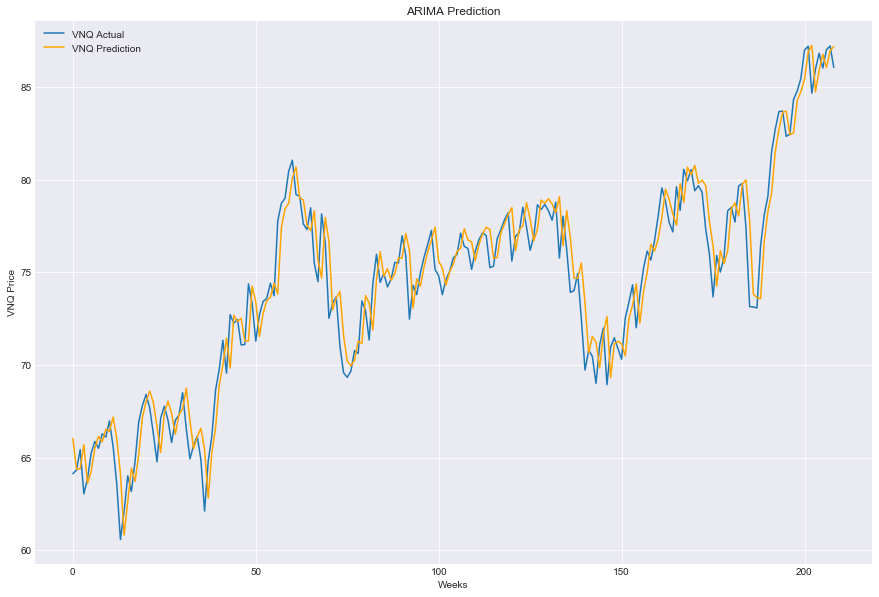

In [10]:
# plot
fig= plt.figure(figsize=(15,10))
plt.plot(test, label = 'VNQ Actual')
plt.plot(predictions, color='orange', label = 'VNQ Prediction')
plt.xlabel('Weeks')
plt.ylabel('VNQ Price')
plt.title('ARIMA Prediction')
plt.legend()
plt.show()

In [11]:
ARIMA_pred_VNQ = pd.DataFrame(predictions) 
ARIMA_pred_VNQ.columns = ['ARIMA_pred_VNQ']
%store ARIMA_pred_VNQ

Stored 'ARIMA_pred_VNQ' (DataFrame)
